# **Шаг 1**
Решить задачу регрессии на примере следующих данных.

In [95]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
     5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,6.3654, 5.1301, 6.4296,
     7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176,
     22.203, 5.2524, 6.5894,9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836,
     6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,11.7,
     5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102,
     9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,7.2182, 8.2951, 10.236, 5.4994,
     20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274,
     5.1077, 5.7292, 5.1884,6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204,
     5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369])
y = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987,
     3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,3.6518,
     5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692,
     24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,4.1164, 3.3928, 10.117,
     5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043,
     1.0179, 6.7504, 1.8396, 4.2885, 4.9981,1.4233, -1.4211, 2.4756, 4.6042, 3.9624,
     5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173,
     20.992, 6.6799, 4.0259,1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526,
     2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695,
     0.152, 2.8214,1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705])

In [96]:
def linear_regression_analytical(x, y):
    x = np.array(x)
    y = np.array(y)
    X = np.c_[np.ones(x.shape[0]), x]
    X_trans = X.T
    koff = np.linalg.inv(X_trans.dot(X)).dot(X_trans).dot(y)
    return koff

In [97]:
m = []
m = linear_regression_analytical(x, y)
print("Коэффициенты:")
print("k:", m[1])
print("b:", m[0])

Коэффициенты:
k: 1.1930336441895957
b: -3.8957808783118772


# **Шаг 2**
Написать функцию, которая реализует численное решение задачи регрессии.

In [98]:
def gradient_descent(x, y, alpha=0.001): # alpha - скорость шага
    X = np.column_stack((np.ones(len(x)), x))
    qtty = np.random.rand(2)
    stan_err = []
    iteration = 0
    while iteration < 1000000:
        predictions = X.dot(qtty)
        errors = predictions - y
        gradient = (2 / len(y)) * X.T.dot(errors) # считываю градиент функции потерь
        qtty1 = qtty.copy()
        qtty -= alpha * gradient # обновляю коэффициенты
        stan_er = (1 / len(y)) * np.sum(np.square(errors)) # средняя квадратичная ошибка
        stan_err.append(stan_er)
        if np.all(np.abs(qtty1 - qtty) < 1e-8):
            break
        iteration += 1
    return qtty, stan_err

# **Шаг 3**
Построить график построенной модели.

In [99]:
def plot_regression_line(x, y, b):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)

    plt.scatter(x, y, label='Тренировочные данные', color = "blue", marker = "o", s = 30)

    y = b[0] + b[1] * x

    plt.plot(x, y, color = "red", label='Линия регрессии')

    plt.legend()
    plt.title('Линия регрессии')

    plt.xlabel('x')
    plt.ylabel('y')

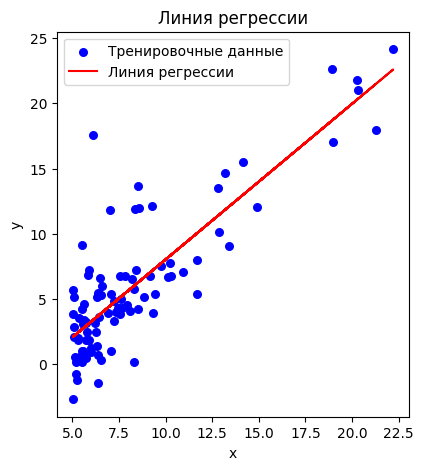

In [100]:
plot_regression_line(x, y, m)

# **Шаг 4**
Сравнить результат численного решения с аналитическим.

In [101]:
qtty, h = gradient_descent(x, y)
print('Аналитический метод: y =', m[1], '* x +', m[0])
print('Численный метод: y =', qtty[1], '* x +', qtty[0])
k_diff = abs(m[1] - qtty[1])
b_diff = abs(m[0] - qtty[0])
print(k_diff, b_diff)

Аналитический метод: y = 1.1930336441895957 * x + -3.8957808783118772
Численный метод: y = 1.1930308591361776 * x + -3.895753155537219
2.7850534181084186e-06 2.7722774658123228e-05


# **Шаг 5**
Решить задачу регрессии для структурированных данных.

In [23]:
!pip install opendatasets

In [24]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/yasserh/song-popularity-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mgk717
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset


100%|██████████| 805k/805k [00:00<00:00, 12.9MB/s]

In [76]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error


f = ('/content/song-popularity-dataset/song_data.csv')
data = pd.read_csv(f)
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [78]:
X = data.drop(columns=['song_name', 'song_popularity'])
y = data['song_popularity']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred1 = model1.predict(X_test)

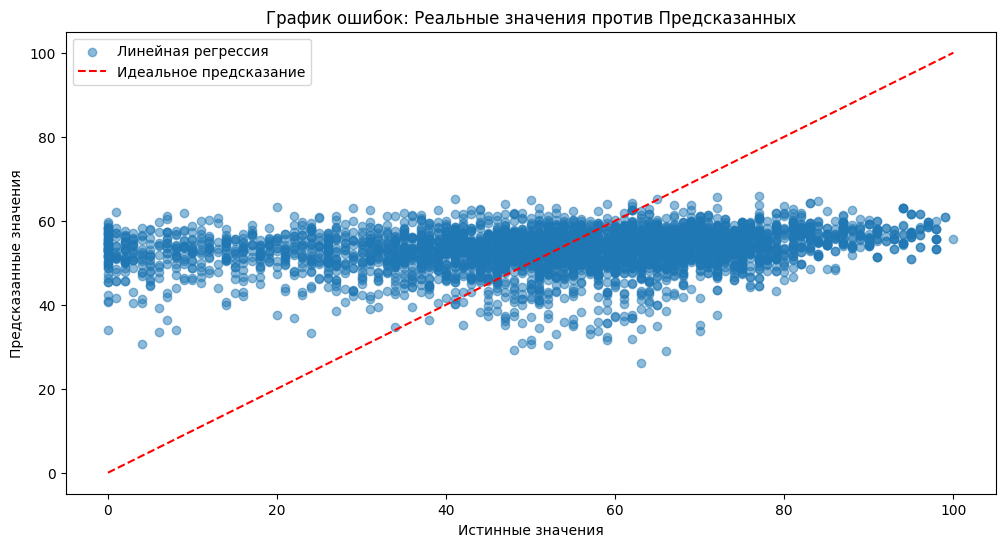

In [83]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred1, label='Линейная регрессия', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Идеальное предсказание')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('График ошибок: Реальные значения против Предсказанных')
plt.legend()
plt.show()

# **Шаг 6**
Сравнить работу линейной регрессии с Lasso-регрессией и с Ridge-регрессией.

In [124]:
y_test1 = y_test.values
y_test1

array([44, 50, 69, ..., 10, 52, 27])

In [129]:
model2 = Lasso(alpha = 1)
model2.fit(X_train, y_train)

Lasso(alpha=1)

In [130]:
y_pred2 = model2.predict(X_test)

In [131]:
print("Predicted values: ", y_pred2[:3])
print("Real values:      ", y_test1[:3])

Predicted values:  [51.39743617 41.49361029 52.88077075]
Real values:       [44 50 69]


In [132]:
model3 = Ridge(alpha = 1)
model3.fit(X_train, y_train)

Ridge(alpha=1)

In [133]:
y_pred3 = model3.predict(X_test)

In [134]:
print("Predicted values: ", y_pred3[:3])
print("Real values:      ", y_test1[:3])

Predicted values:  [53.69943726 31.68643043 50.55036922]
Real values:       [44 50 69]


Регрессия Лассо лучше использовать, потому что она способна полностью сжать незначительные переменные до нуля и удалить их из модели. И точнее предсказала значения

# **Шаг 7**
Вывести метрики оценки качества модели для задачи регрессии.

In [135]:
mse1 = mean_squared_error(y_test, y_pred1) # Линейная
r2_1 = r2_score(y_test, y_pred1)
print('MSE:', mse1)
print('R2:', r2_1)

MSE: 461.6379271397563
R2: 0.04239734907577464


In [136]:
mse2 = mean_squared_error(y_test, y_pred2) # Lasso
r2_2 = r2_score(y_test, y_pred2)
print('MSE:', mse2)
print('R2:', r2_2)

MSE: 476.6271626975835
R2: 0.011304297873424907


In [137]:
mse3 = mean_squared_error(y_test, y_pred3) # Ridge
r2_3 = r2_score(y_test, y_pred3)
print('MSE:', mse3)
print('R2:', r2_3)

MSE: 461.6316665266001
R2: 0.04241033583314946
